In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
# Load the CSV file
mobile_sales_df = pd.read_csv("mobile_sales.csv")

# Display the first 5 rows of the dataframe
mobile_sales_df.head()

,TransactionID,Date,MobileModel,Brand,Price,UnitsSold,TotalRevenue,CustomerAge,CustomerGender,Location,PaymentMethod
0,79397f68-61ed-4ea8-bcb2-f918d4e6c05b,2024-01-06,direction,Green Inc,1196.95,85,28002.80,32,Female,Port Erik,Online
1,4f87d114-f522-4ead-93e3-f336402df6aa,2024-04-05,right,Thomas-Thompson,1010.34,64,2378.82,55,Female,East Linda,Credit Card
2,6750b7d6-dcc5-48c5-a76a-b6fc9d540fe1,2024-02-13,summer,Sanchez-Williams,400.80,95,31322.56,57,Male,East Angelicastad,Online
3,7da7de95-f772-4cc2-bce0-b0873f98233e,2024-04-17,keep,Greer and Sons,338.60,79,31159.75,46,Other,East Kevin,Cash
4,469044af-0d60-4d87-af66-c6603e844057,2024-06-02,option,Brown and Sons,839.79,41,11523.36,38,Male,New Lindaborough,Online


In [10]:
# Check for missing values
missing_values = mobile_sales_df.isnull().sum()

# Check data types
data_types = mobile_sales_df.dtypes

missing_values, data_types


(TransactionID     0
 Date              0
 MobileModel       0
 Brand             0
 Price             0
 UnitsSold         0
 TotalRevenue      0
 CustomerAge       0
 CustomerGender    0
 Location          0
 PaymentMethod     0
 dtype: int64,
 TransactionID      object
 Date               object
 MobileModel        object
 Brand              object
 Price             float64
 UnitsSold           int64
 TotalRevenue      float64
 CustomerAge         int64
 CustomerGender     object
 Location           object
 PaymentMethod      object
 dtype: object)

In [11]:
# Convert the Date column to datetime
mobile_sales_df['Date'] = pd.to_datetime(mobile_sales_df['Date'])

# Verify the conversion
mobile_sales_df['Date'].dtypes


dtype('<M8[ns]')

In [41]:
# Summary statistics for numerical columns
numerical_summary = mobile_sales_df.describe()

# Display summary statistics
round(numerical_summary)


,Date,Price,UnitsSold,TotalRevenue,CustomerAge
count,1000,1000.0,1000.0,1000.0,1000.0
mean,2024-04-12 13:49:26.400000,808.0,50.0,40218.0,41.0
min,2024-01-01 00:00:00,103.0,1.0,117.0,18.0
25%,2024-02-19 00:00:00,458.0,25.0,13316.0,29.0
50%,2024-04-11 12:00:00,824.0,51.0,30861.0,41.0
75%,2024-06-06 00:00:00,1158.0,75.0,60770.0,53.0
max,2024-07-25 00:00:00,1499.0,99.0,141412.0,64.0
std,NaN,402.0,29.0,32715.0,14.0


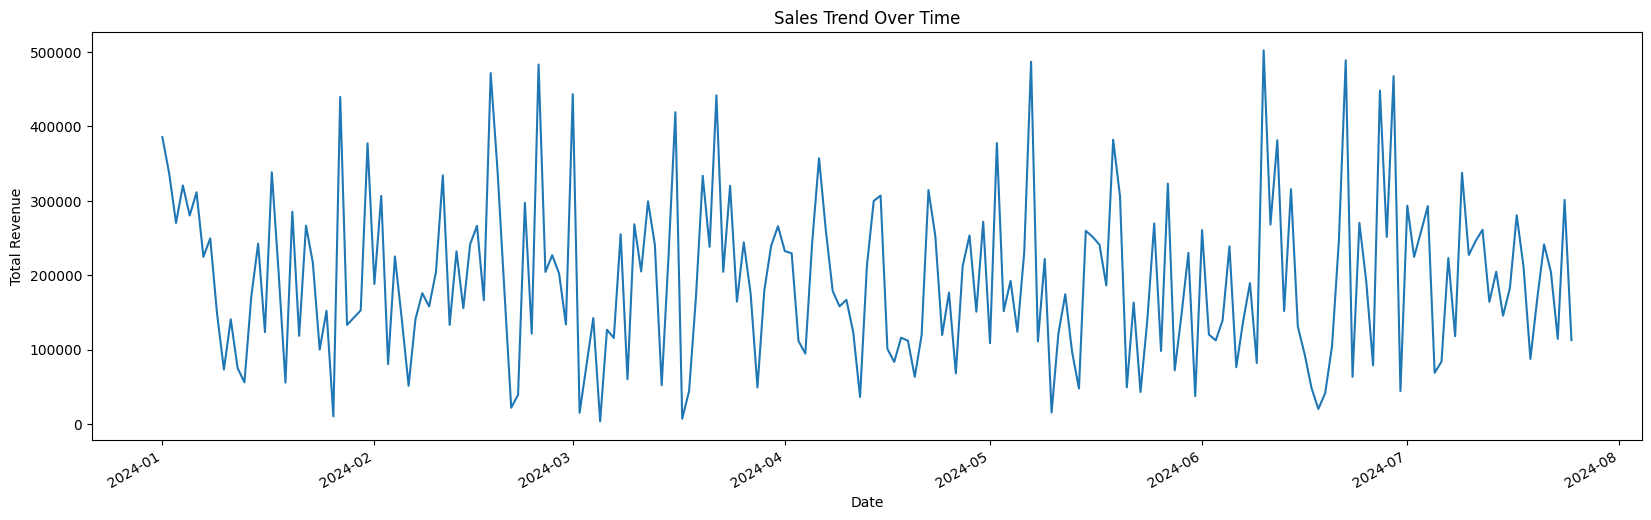

In [16]:
# Group data by Date and sum the TotalRevenue
sales_trend = mobile_sales_df.groupby('Date')['TotalRevenue'].sum()

# Plot the sales trend
plt.figure(figsize=(20,6))
sales_trend.plot()
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.show()


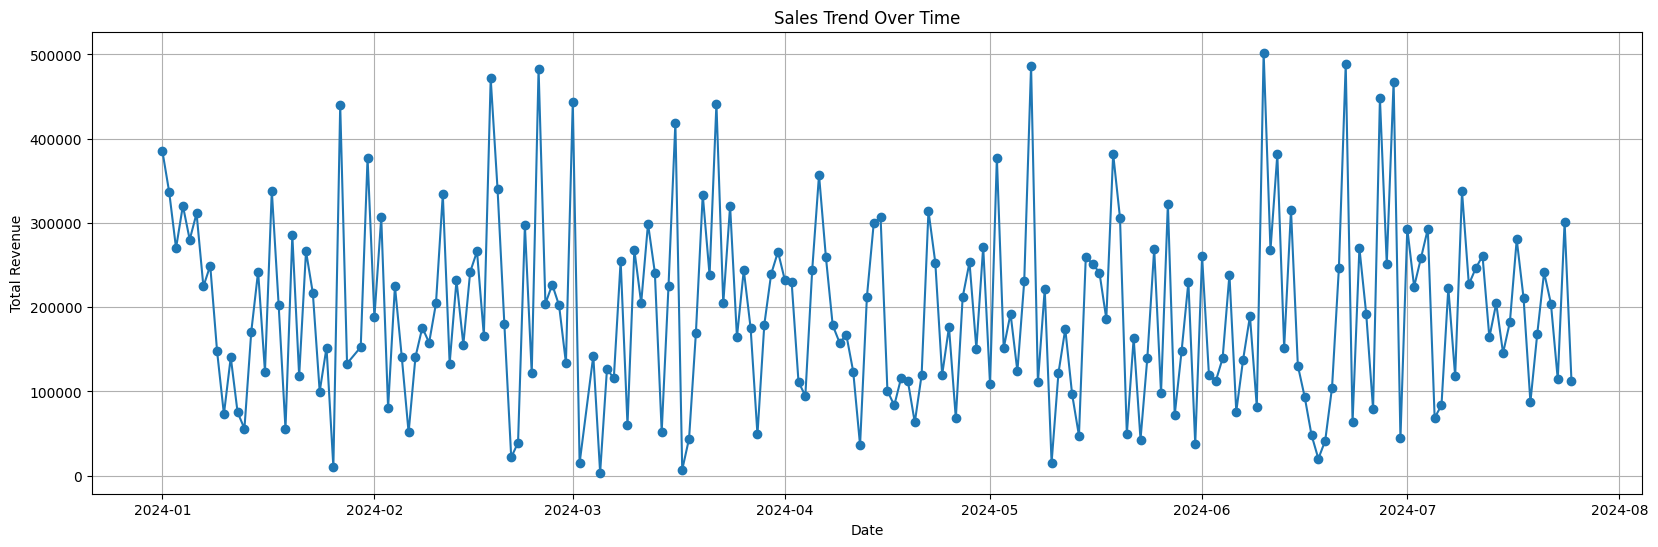

In [40]:
# Group data by Date and sum the TotalRevenue
sales_trend = mobile_sales_df.groupby('Date')['TotalRevenue'].sum()

# Plot the sales trend
plt.figure(figsize=(20, 6))
plt.plot(sales_trend.index, sales_trend.values, marker='o')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()


In [23]:
# Get the top 10 most popular mobile models
top_mobile_models = mobile_sales_df.groupby('MobileModel')['UnitsSold'].sum().nlargest(10)

# Display the top 10 mobile models
print(top_mobile_models)


MobileModel
fine         278
scientist    275
heavy        263
many         255
fly          249
enter        246
keep         246
attack       240
choice       232
guy          229
Name: UnitsSold, dtype: int64


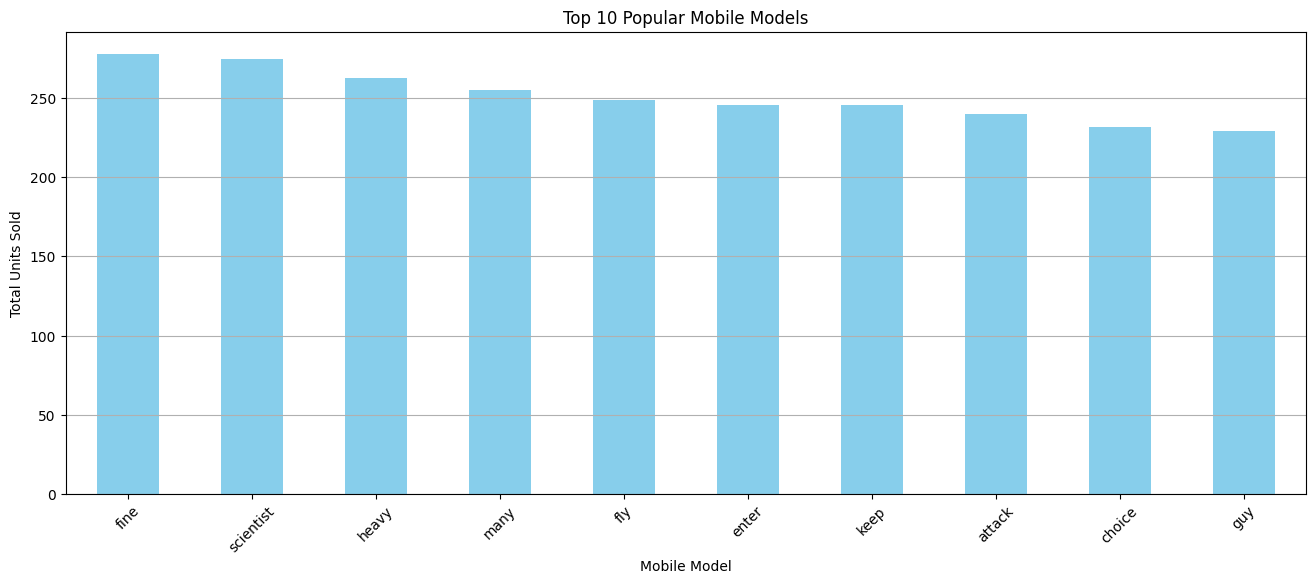

In [25]:
# Plot the top 10 mobile models
plt.figure(figsize=(16, 6))
top_mobile_models.plot(kind='bar', color='skyblue')
plt.title('Top 10 Popular Mobile Models')
plt.xlabel('Mobile Model')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [26]:
# Get the top 10 most popular brands
top_brands = mobile_sales_df.groupby('Brand')['UnitsSold'].sum().nlargest(10)

# Display the top 10 brands
print(top_brands)


Brand
Martinez Ltd        199
Cobb LLC            179
Garrett Group       173
Harris and Sons     157
Wallace LLC         133
Williams Ltd        132
Smith PLC           123
Sanchez PLC         122
Johnson LLC         111
Escobar and Sons     99
Name: UnitsSold, dtype: int64


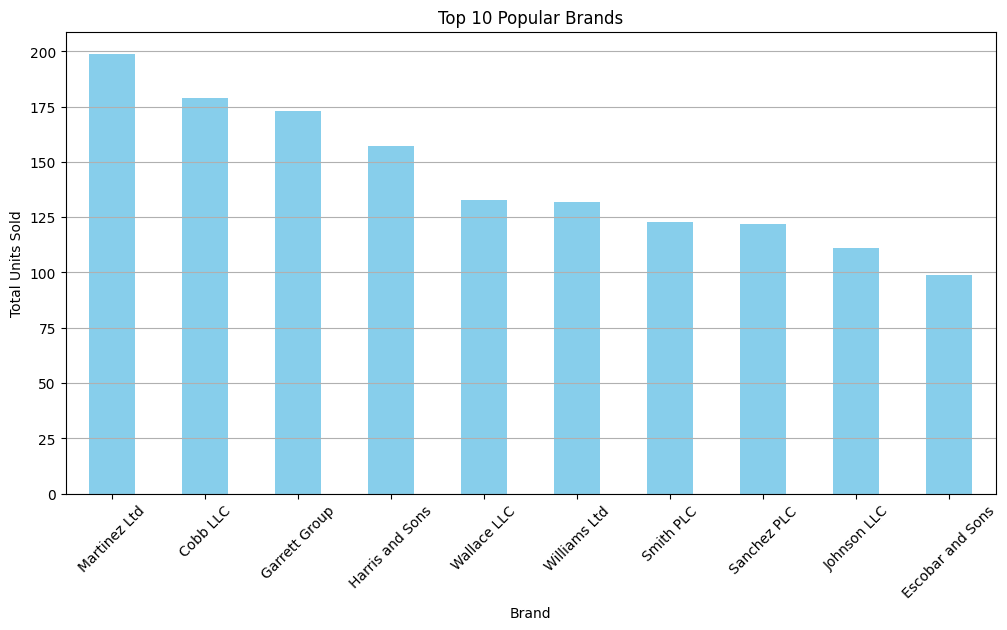

In [27]:
# Plot the top 10 brands
plt.figure(figsize=(12, 6))
top_brands.plot(kind='bar', color='skyblue')
plt.title('Top 10 Popular Brands')
plt.xlabel('Brand')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


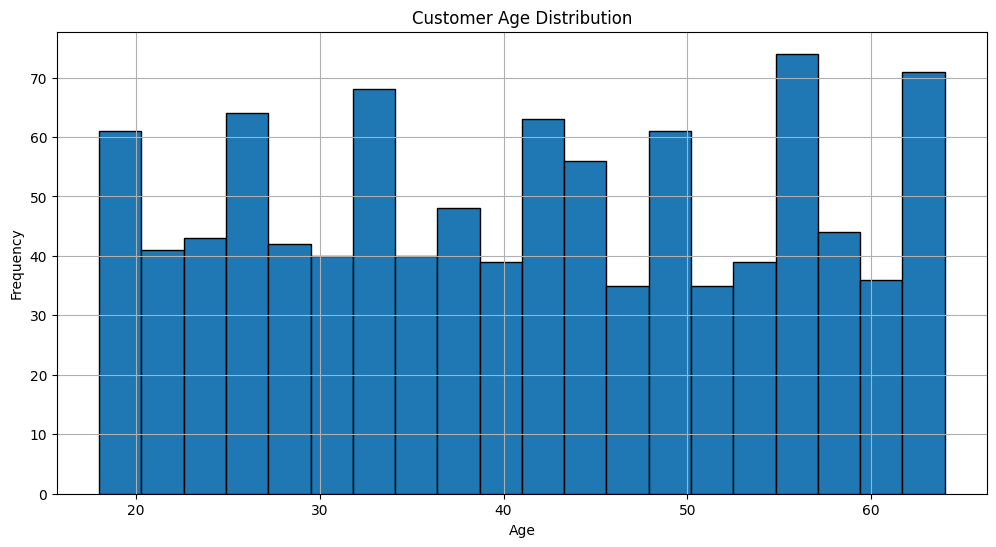

In [28]:
# Age distribution
plt.figure(figsize=(12, 6))
mobile_sales_df['CustomerAge'].hist(bins=20, edgecolor='black')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

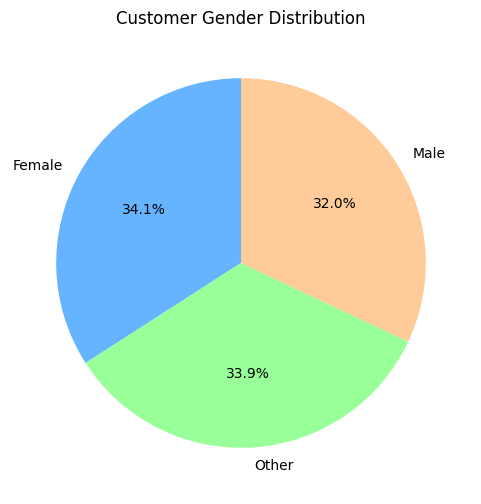

In [29]:
# Gender distribution
plt.figure(figsize=(6, 6))
mobile_sales_df['CustomerGender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title('Customer Gender Distribution')
plt.ylabel('')
plt.show()

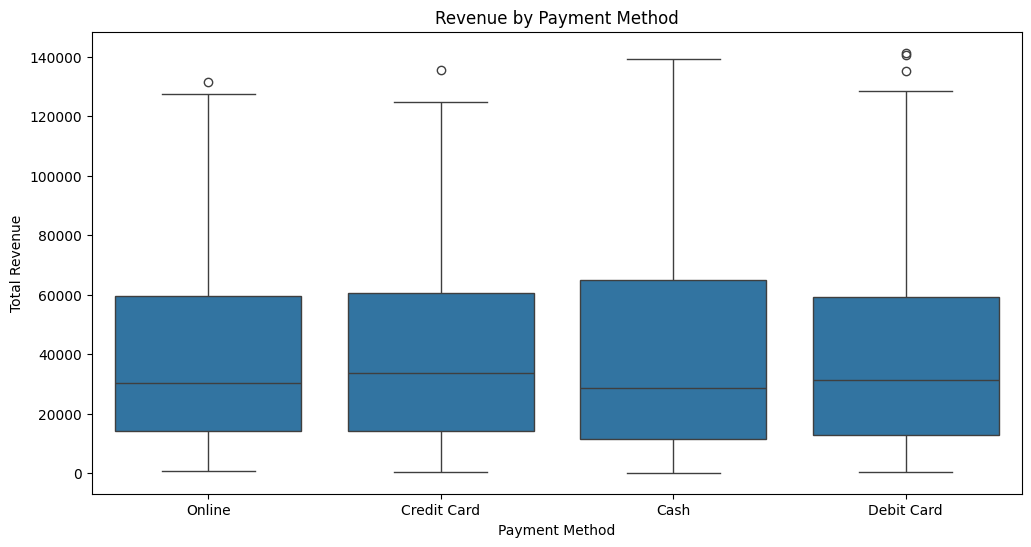

In [31]:
# Revenue by Payment Method
plt.figure(figsize=(12, 6))
sns.boxplot(x='PaymentMethod', y='TotalRevenue', data=mobile_sales_df)
plt.title('Revenue by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Revenue')
plt.show()

In [32]:
# Get the top 10 locations by total revenue
top_locations_revenue = mobile_sales_df.groupby('Location')['TotalRevenue'].sum().nlargest(10)

# Display the top 10 locations
print(top_locations_revenue)


Location
Lake Amanda         185827.20
Danielport          184981.62
Allisonburgh        175075.52
Port Andrew         166146.74
West Stephen        160902.40
New Kimberly        151758.78
West Jennifer       144742.45
Lake Jessica        144246.83
Michaelland         142698.60
New Margaretfurt    140738.88
Name: TotalRevenue, dtype: float64


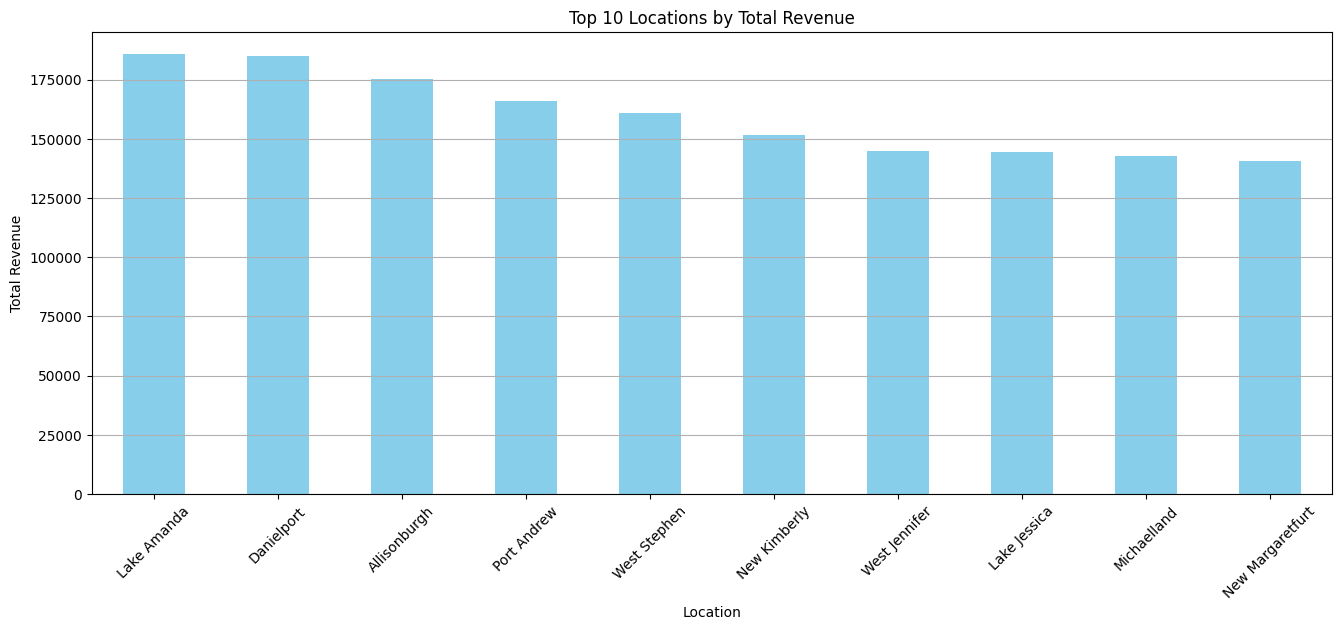

In [33]:
# Plot the top 10 locations by revenue
plt.figure(figsize=(16, 6))
top_locations_revenue.plot(kind='bar', color='skyblue')
plt.title('Top 10 Locations by Total Revenue')
plt.xlabel('Location')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [36]:
# Get the total units sold by customer gender
units_sold_by_gender = mobile_sales_df.groupby('CustomerGender')['UnitsSold'].sum()

# Display the units sold by gender
print(units_sold_by_gender)

CustomerGender
Female    17480
Male      15457
Other     17137
Name: UnitsSold, dtype: int64


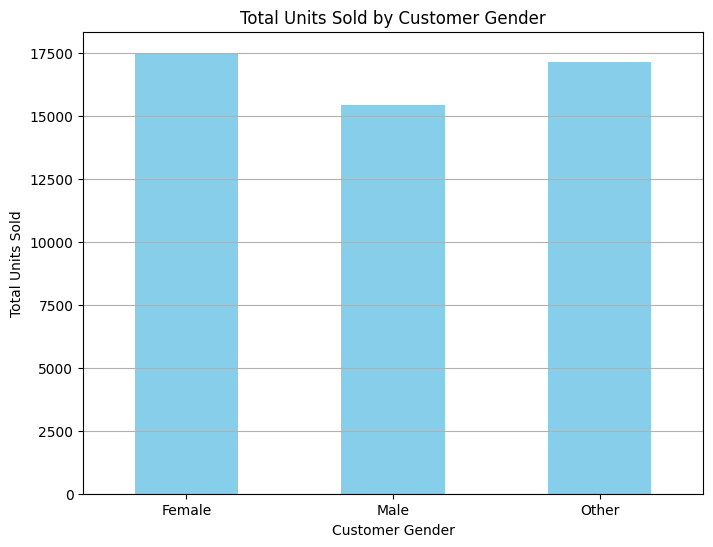

In [37]:
# Plot the units sold by gender
plt.figure(figsize=(8, 6))
units_sold_by_gender.plot(kind='bar', color='skyblue')
plt.title('Total Units Sold by Customer Gender')
plt.xlabel('Customer Gender')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()